## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [2]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [3]:
diabetes_data.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

**<font color='teal'> Apply the describe function to the data.</font>**

In [4]:
diabetes_data.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [5]:
import pandas as pd
import numpy as np

# Assuming you have already loaded your dataset into a DataFrame called df

# List of columns where you want to replace 0 with NaN
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0 with NaN in the specified columns
diabetes_data[columns_to_replace] = diabetes_data[columns_to_replace].replace(0, np.nan)

# Display the updated DataFrame to verify the changes
print(diabetes_data[columns_to_replace].head())


   Glucose  BloodPressure  SkinThickness  Insulin   BMI
0    148.0           72.0           35.0      NaN  33.6
1     85.0           66.0           29.0      NaN  26.6
2    183.0           64.0            NaN      NaN  23.3
3     89.0           66.0           23.0     94.0  28.1
4    137.0           40.0           35.0    168.0  43.1


**<font color='teal'> Plot histograms of each column. </font>**

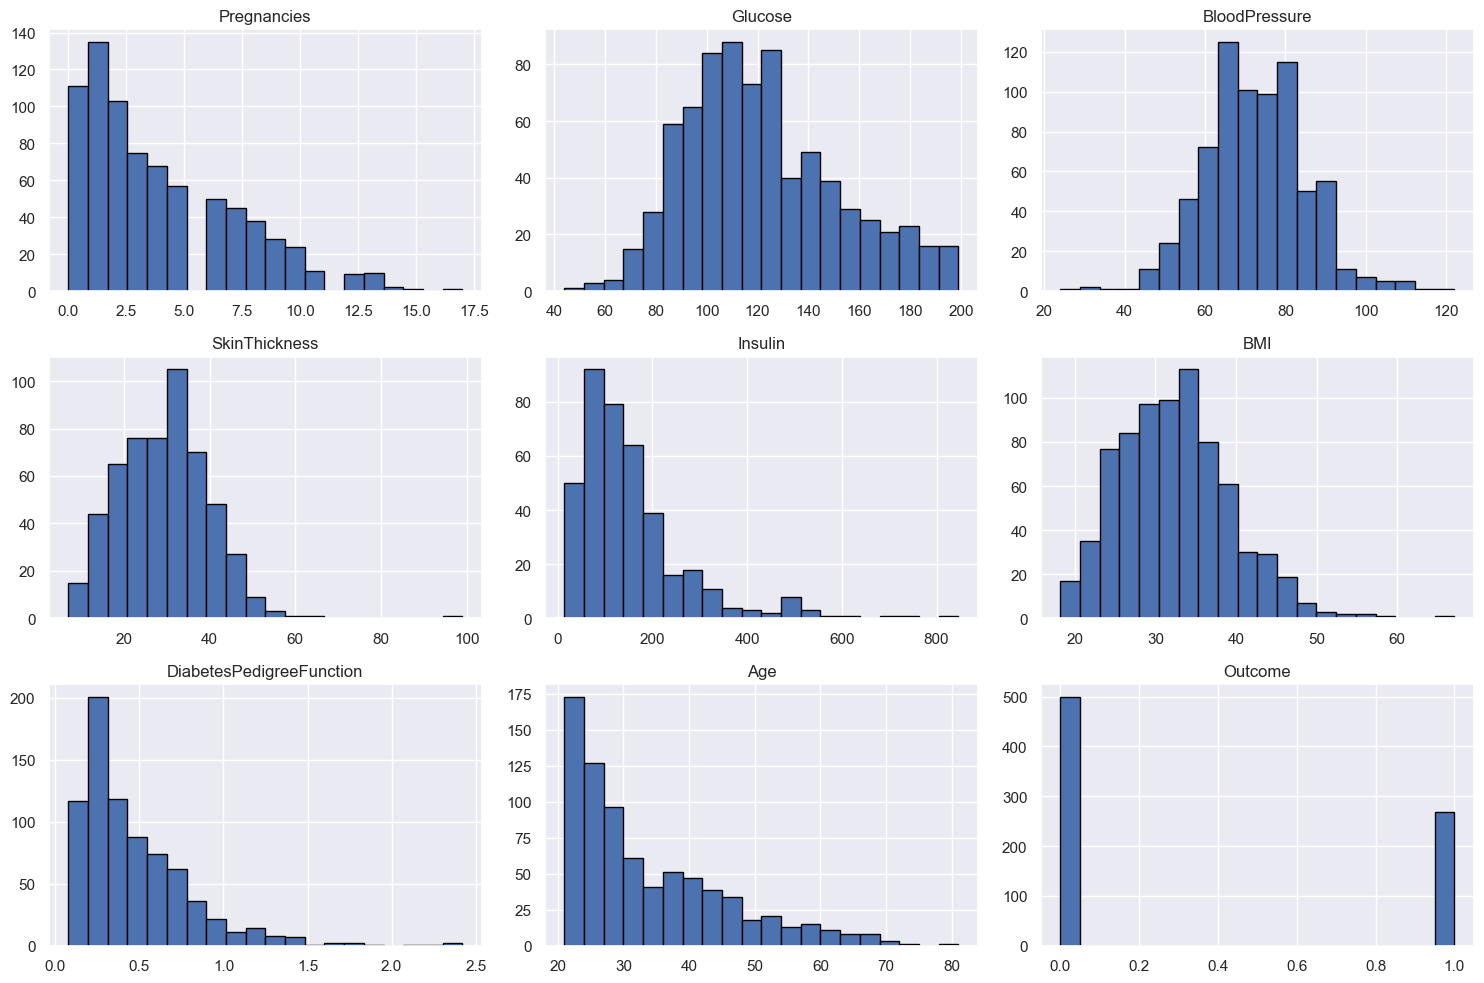

In [6]:
diabetes_data.hist(figsize=(15, 10), bins=20, edgecolor='black')

# Display the plots
plt.tight_layout()
plt.show()

#### Replace the zeros with mean and median values.

In [7]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

#Plot histograms of each column after replacing nan.

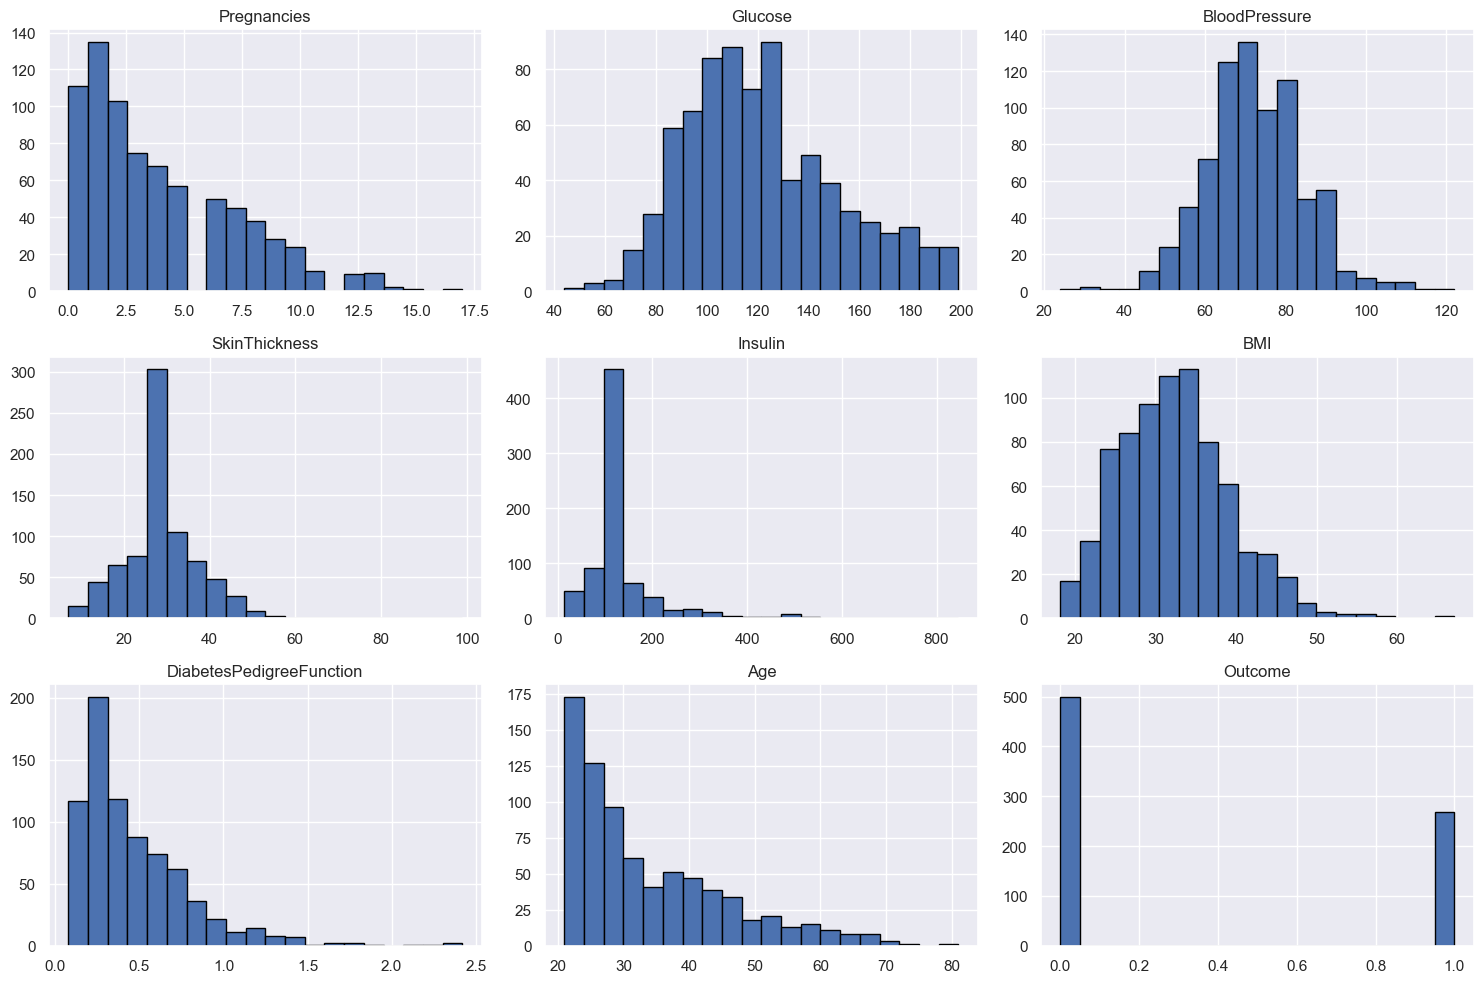

In [8]:
diabetes_data.hist(figsize=(15, 10), bins=20, edgecolor='black')

# Display the plots
plt.tight_layout()
plt.show()

#### Plot the correlation matrix heatmap

Correlation between various features


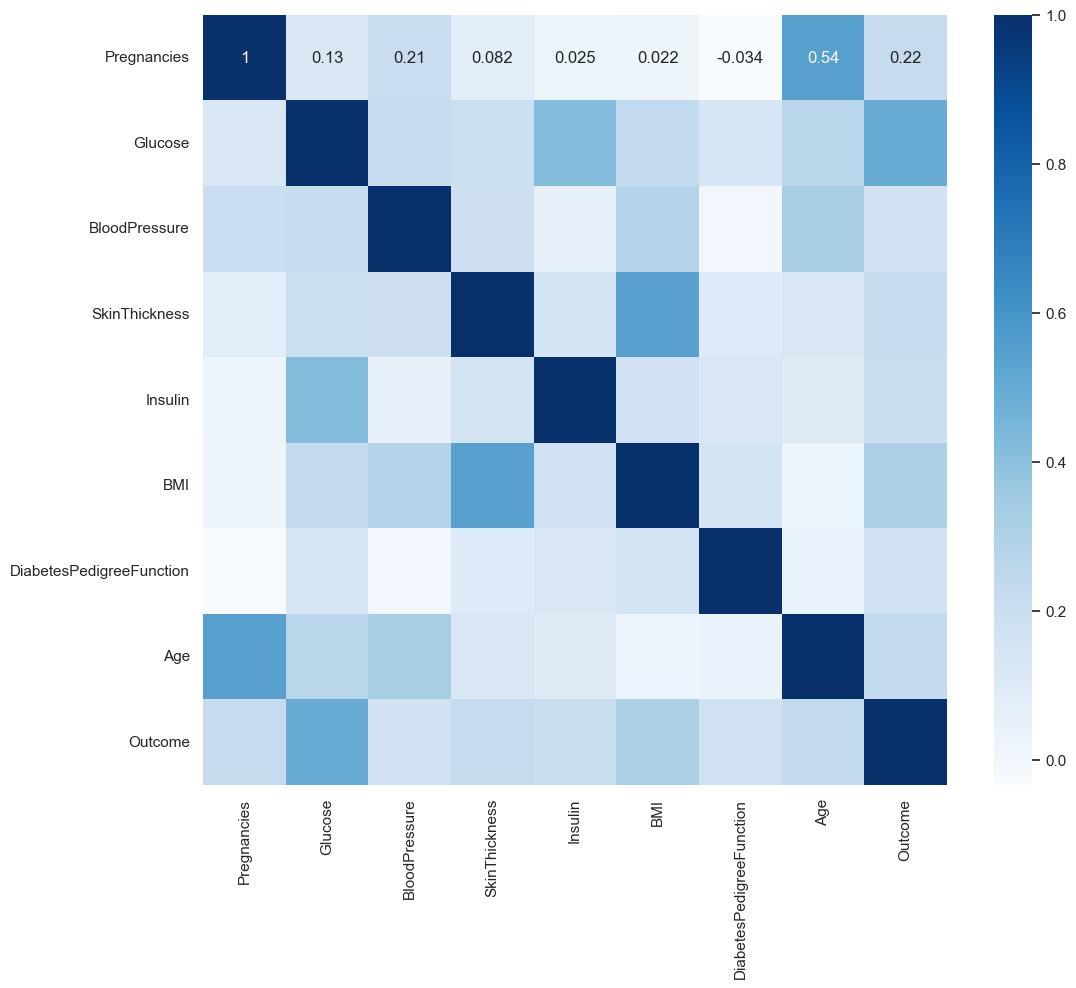

In [9]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [10]:
y = diabetes_data['Outcome']

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [12]:
from sklearn.model_selection import train_test_split
X = diabetes_data.drop(columns=['Outcome'])

# Split the data into 70% training and 30% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting datasets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (537, 8)
X_test shape: (231, 8)
y_train shape: (537,)
y_test shape: (231,)


**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Convert the scaled data back to DataFrame for better readability (optional)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Display the first few rows of the scaled training data
print(X_train_scaled.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.836294 -0.896108      -1.004400      -1.269545 -0.956993 -1.203826   
1     0.390728 -0.563997      -0.020266       0.029693  2.136797  0.664498   
2    -1.143050  0.432336      -0.348311       1.565156  1.267755  1.440571   
3     0.083972  0.299491      -0.348311      -0.915207  0.294428  0.118373   
4    -0.836294 -0.630419      -3.464737       1.092706 -0.667312  1.584288   

   DiabetesPedigreeFunction       Age  
0                 -0.614216 -0.948610  
1                 -0.909738 -0.434667  
2                 -0.306991 -0.777296  
3                 -0.906812 -0.434667  
4                 -0.839515 -0.006380  


#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [16]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [22]:
print(train_scores)
print(test_scores)

[1.0, 0.845437616387337, 0.839851024208566, 0.8212290502793296, 0.8212290502793296, 0.8212290502793296, 0.8119180633147114, 0.8044692737430168, 0.7951582867783985]
[0.683982683982684, 0.7056277056277056, 0.6926406926406926, 0.70995670995671, 0.670995670995671, 0.7012987012987013, 0.696969696969697, 0.696969696969697, 0.70995670995671]


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [23]:
max_train_score = max(train_scores)
best_n_neighbors = train_scores.index(max_train_score) + 1  # +1 because index is zero-based
print(f"\nThe maximum training accuracy of {max_train_score:.4f} was achieved with {best_n_neighbors} neighbors.")


The maximum training accuracy of 1.0000 was achieved with 1 neighbors.


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [24]:
max_test_score = max(test_scores)
best_n_neighbors_test = test_scores.index(max_test_score) + 1  # +1 because index is zero-based

print(f"\nThe maximum testing accuracy of {max_test_score:.4f} was achieved with {best_n_neighbors_test} neighbors.")


The maximum testing accuracy of 0.7100 was achieved with 4 neighbors.


Plot the train and test model performance by number of neighbors.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

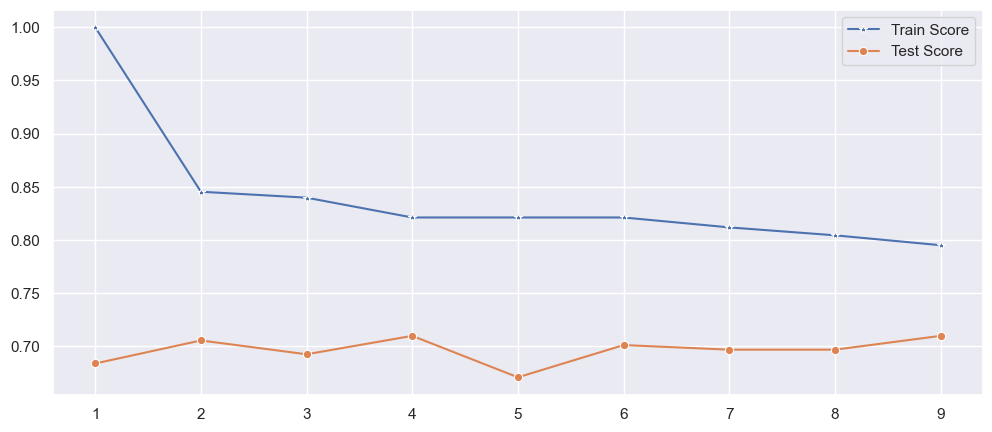

In [26]:
plt.figure(figsize=(12,5))
p = sns.lineplot(x = range(1,10), y = train_scores,marker='*',label='Train Score')
p = sns.lineplot(x = range(1,10),y = test_scores,marker='o',label='Test Score')

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [27]:
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have already identified the best number of neighbors
# Based on the plot or scores, let's assume the best n_neighbors is 3 (replace with the actual best)

best_n_neighbors = 3  # Replace with the best number from your plot

# Initialize the KNeighborsClassifier with the best number of neighbors
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Score the model on the training data
train_score = knn.score(X_train, y_train)

# Score the model on the test data
test_score = knn.score(X_test, y_test)

# Print the scores
print(f"Best number of neighbors: {best_n_neighbors}")
print(f"Train Accuracy with {best_n_neighbors} neighbors: {train_score:.4f}")
print(f"Test Accuracy with {best_n_neighbors} neighbors: {test_score:.4f}")


Best number of neighbors: 3
Train Accuracy with 3 neighbors: 0.8399
Test Accuracy with 3 neighbors: 0.6926


In [28]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

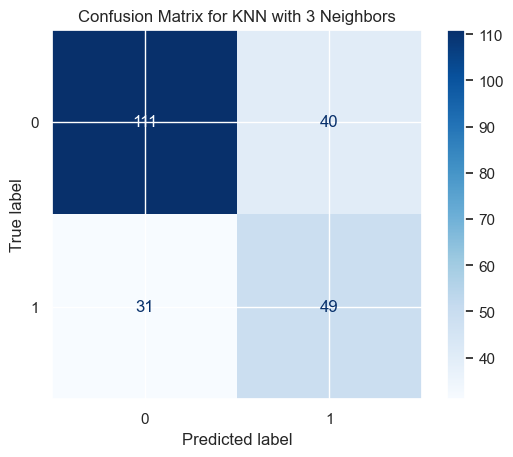

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming knn is the model you just fitted, and X_test, y_test are defined

# Predict the test data
y_pred = knn.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

# Add a title to the plot
plt.title(f'Confusion Matrix for KNN with {best_n_neighbors} Neighbors')

# Display the plot
plt.show()


**<font color='teal'> Print the classification report </font>**

In [30]:
from sklearn.metrics import classification_report

# Assuming knn is the model you just fitted, and X_test, y_test are defined

# Predict the test data
y_pred = knn.predict(X_test)

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.78      0.74      0.76       151
           1       0.55      0.61      0.58        80

    accuracy                           0.69       231
   macro avg       0.67      0.67      0.67       231
weighted avg       0.70      0.69      0.70       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [31]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [32]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7526440879382056
Best Parameters: {'n_neighbors': 31}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [34]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Assuming your DataFrame is named df and y is already defined as the 'Outcome' column

# Define the feature matrix X (all columns except 'Outcome')
X = diabetes_data.drop(columns=['Outcome'])

# Split the data into 70% training and 30% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the StandardScaler and scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Set up the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500]  # Different values for the number of trees in the forest
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the GridSearchCV model
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and the best score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Evaluate the best model on the test data
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_scaled)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters found: {'n_estimators': 200}
Best cross-validation score: 0.7690

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.63      0.62      0.63        80

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231

